# Phase 1: ASK

The business tasks in this scenario include:

1. Analyzing smart device fitness data: The junior data analyst is tasked with analyzing smart device data related to one of Bellabeat's products to gain insight into how consumers are using their smart devices. The purpose of this analysis is to identify trends and patterns that can inform Bellabeat's marketing strategy.

2. Developing marketing strategy recommendations: Based on the analysis of smart device data, the data analyst is also responsible for providing high-level recommendations for Bellabeat's marketing strategy. The recommendations should be based on insights from the data and should align with Bellabeat's overall mission and business goals.

The key stakeholders in this scenario include:

1. Urška Sršen: As Bellabeat's cofounder and Chief Creative Officer, Sršen is responsible for driving the company's growth and innovation. She has identified the need to analyze smart device data as a way to unlock new growth opportunities for the company, and has tasked the marketing analytics team with this responsibility.

2. Sando Mur: As a mathematician and Bellabeat's cofounder, Mur is a key member of the executive team. He is likely to be involved in the decision-making process related to the marketing strategy recommendations that come out of the data analysis.

3. Bellabeat marketing analytics team: This team of data analysts is responsible for collecting, analyzing, and reporting data that helps guide Bellabeat's marketing strategy. The junior data analyst who is the main character in this scenario is a member of this team.

4. Bellabeat customers: The insights and recommendations generated from the smart device data analysis and marketing strategy development will ultimately impact Bellabeat's customers. The goal is to use the data to create marketing strategies that better meet their needs and preferences.

# Phase 2: Prepare

**Determine the credibility of the data.**

It is stored in CSV files and organized in long format. It is rated 10/10 for usability on Kaggle, and the original data source can be located and cited using a DOI. The data appears to be comprehensive and updated regularly. However, it is unclear whether there are any issues with bias in the data. Licensing, privacy, security, and accessibility are addressed by examining the original data source. The data's integrity is assumed to be valid as it has a license, acknowledgement for the authors, and the consent from the users

# Import neccessary library

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset

In [27]:
import pandas as pd
import os

path = os.getcwd() + "/data" # get the current working directory
all_files = os.listdir(path) # get a list of all files in the current working directory
csv_files = [file for file in all_files if file.endswith(".csv")] # select only CSV files


daily_files = [file for file in csv_files if "daily" in file.lower()]
hourly_files = [file for file in csv_files if "hourly" in file.lower()]
minute_files = [file for file in csv_files if "minute" in file.lower()]
other_files = [file for file in csv_files if file not in daily_files and file not in hourly_files and file not in minute_files]

daily_dfs = {}
hourly_dfs = {}
minute_dfs = {}
other_dfs = {}

# Store the daily files into the "daily_dfs" dictionary
for file in daily_files:
    filename, file_extension = os.path.splitext(file)
    df = pd.read_csv(path + "/" + file)
    daily_dfs[filename] = df

# Store the hourly files into the "hourly_dfs" dictionary
for file in hourly_files:
    filename, file_extension = os.path.splitext(file)
    df = pd.read_csv(path + "/" + file)
    hourly_dfs[filename] = df

# Store the minute files into the "minute_dfs" dictionary
for file in minute_files:
    filename, file_extension = os.path.splitext(file)
    df = pd.read_csv(path + "/" + file)
    minute_dfs[filename] = df

# Store the other files into the "other_dfs" dictionary
for file in other_files:
    filename, file_extension = os.path.splitext(file)
    df = pd.read_csv(path + "/" + file)
    other_dfs[filename] = df
   

data_frames = [daily_dfs, hourly_dfs, minute_dfs, other_dfs]

# Phase 3: Process

# Data cleaning

## Step 1: Handling missing value (remove/fill)

In [28]:
# Check for missing values
for df_dict in data_frames:
    for filename, df in df_dict.items():
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print(filename)
        print(df.isnull().sum())

++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dailyActivity_merged
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dailyCalories_merged
Id             0
ActivityDay    0
Calories       0
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dailySteps_merged
Id             0
ActivityDay    0
StepTotal      0
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++
daily_activity_updated
Id                          0
date                        0
TotalSteps                  0
TotalDis

In general, the data is relatively complete. There is not many missing values except for the 'weightLogInfo_merged' data. There are 65 rows with missing value regardless of 'Fat' column. That is almost 100% missing (65/67). Hence there is no point of keeping this collumn so I am going to remove it. Also I will choose to remove missing values in this project instead of filling in missing values because there is not many missing values so when we remove rows with missing values we still have enough data to answer the busines objectives.

In [29]:
# Drop the 'Fat' column of the weightLogInfo_merged dataset
#because there are only two rows contain value in that column
other_dfs['weightLogInfo_merged'].drop(columns=["Fat"], inplace=True, axis=1)


In [30]:
#Remove missing values
for df_dict in data_frames:
    for filename, df in df_dict.items():
        df.dropna(inplace=True)

## Step 2: Remove any duplicates

In [31]:
for df_dict in data_frames:
    for filename, df in df_dict.items():
        df.drop_duplicates(inplace=True)
        
        #Reset the index
        df.reset_index(drop=True, inplace=True)
        

## Step 3: Format string data (if applicable)

Taking a look at the dataset, there is no columns with string data so this step is not needed. 

## Step 4: Handling outliers (remove/handle)

In [32]:
# determine outlier
for df_dict in data_frames:
    for filename, df in df_dict.items():
        #Exclude dataset contains "boolean" data
        if filename == "weightLogInfo_merged":
            continue
        Q1 = df.quantile(0.25)
        Q3 = df.quantile(0.75)
        IQR = Q3 - Q1
        
        #Remove outliers
        df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/3194045848.py:7: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/3194045848.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/3194045848.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > 

It is common for some individuals who are highly active exists in the dataset, so I choose remove them from the dataset to avoid their data to skew the dataset too much. However, it is best practice to investigate each outlier before deciding whether to remove or standardise them because outliers data may contain useful phenomeno.

## Step 5: Convert data types (if applicable)

There is no need for this step in this project

# Data summary and manipulation

### Summary

After investigate the data, I recognise the datasets related to physcial activity are broken down into daily, hourly, minute. However, all of them have been merged into 'dailyActivity_merged.csv' file.  I will only use that file to find the insights for physical activities since it is enough to complete the business goals.

In [33]:
# Perform data summary for each of the pandas DataFrames
for df_dict in data_frames:
    for filename, df in df_dict.items():
        if filename in ['dailyActivity_merged', 'sleepDay_merged', 'heartrate_seconds_merged', 'weightLogInfo_merged']:
            print("=================================================================================")
            print(f"Data summary for file {filename}:")
            # Count the number of unique values in the "Id" column
            unique_id_count = df["Id"].nunique()

            # Print the result
            print(f"The number of unique Id values is: {unique_id_count}")
            print(df.info())
            print(df.describe())
            print("\n")


Data summary for file dailyActivity_merged:
The number of unique Id values is: 33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null

From the summary above we can observer the following:
- 33 people provide data for physical activities
- 24 people provide data for sleep 
- 14 people provide data for heart rate
- 8 people provide data for weight

### Manipulation

I will add two more extra collumn to the 'daily_activity_merged' dataset called 'weekday', showing what day of the week for the current day, and 'TotalActiveMinutes', which sum up active minutes of the given day.

### Daily activity

In [34]:
daily_activity_df = daily_dfs['dailyActivity_merged']
# Create a new column with the weekdays
daily_activity_df['ActivityDate'] = pd.to_datetime(daily_activity_df["ActivityDate"])
daily_activity_df['weekday'] = daily_activity_df['ActivityDate'].dt.day_name()
daily_activity_df['TotalActiveMinutes'] = daily_activity_df['FairlyActiveMinutes'] + daily_activity_df['LightlyActiveMinutes'] + daily_activity_df['VeryActiveMinutes']

# Rename the columns
daily_activity_df = daily_activity_df.rename(columns={'ActivityDate': 'date'})

daily_activity_df['date'] = pd.to_datetime(daily_activity_df["date"])



daily_activity_df.to_csv('daily_activity_updated.csv', index=False)


In [35]:
daily_activity_df.head()

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,weekday,TotalActiveMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,366
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,257
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,222
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,272
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,267


### Heart Rate

For the heart rate data, I will separate 'Time' column into 2 different columns named 'date', contains date information, and 'time', contain time information. Also, I create an extra column name 'Time_Category' to classify time of the day into 4 different group: morning (5am to 12pm), afternoon(12pm to 17pm), evening(17pm to 12am), and night (12am to 5am).

In [36]:
heart_rate_df = other_dfs["heartrate_seconds_merged"] 
heart_rate_df['Time'] = pd.to_datetime(heart_rate_df["Time"])
# Create a new column with the weekdays
heart_rate_df['weekday'] = heart_rate_df['Time'].dt.day_name()
# Extract the date and time information into separate columns
heart_rate_df['date'] = heart_rate_df['Time'].dt.date
heart_rate_df['time'] = heart_rate_df['Time'].dt.time
heart_rate_df = heart_rate_df.drop('Time', axis=1)

# Define a function to classify time into categories
def classify_time(t):
    hour = t.hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'


# Apply the function to the 'Time' column to create a new column 'Time_Category'
heart_rate_df['Time_Category'] = heart_rate_df['time'].apply(classify_time)

#Export to new csv file
heart_rate_df.to_csv('hear_rate_updated.csv', index=False)

# Show the resulting dataframe
heart_rate_df.head()

,Id,Value,weekday,date,time,Time_Category
0,2022484408,97,Tuesday,2016-04-12,07:21:00,morning
1,2022484408,102,Tuesday,2016-04-12,07:21:05,morning
2,2022484408,105,Tuesday,2016-04-12,07:21:10,morning
3,2022484408,103,Tuesday,2016-04-12,07:21:20,morning
4,2022484408,101,Tuesday,2016-04-12,07:21:25,morning


After that, I compute the average heart of people and group them by Id and weekday for later analysis

In [37]:
# group the dataframe by 'Id' and 'weekday' and compute the mean of 'Value'
heart_rate_mean = heart_rate_df.groupby(['Id', 'weekday','date'])['Value'].mean()

# reset the index of the resulting dataframe to make 'Id' and 'weekday' columns again
heart_rate_mean = heart_rate_mean.reset_index()

# Rename the columns
heart_rate_mean = heart_rate_mean.rename(columns={'Value': 'AvgHeartRate'})

# print the resulting dataframe
heart_rate_mean.head()

,Id,weekday,date,AvgHeartRate
0,2022484408,Friday,2016-04-15,80.437382
1,2022484408,Friday,2016-04-22,80.125444
2,2022484408,Friday,2016-04-29,83.412873
3,2022484408,Friday,2016-05-06,81.722098
4,2022484408,Monday,2016-04-18,82.712829


### Sleep

Similarly, for sleep datset, I breakdown the 'SleepDay' column in to 'date' and 'time'. Then I added an additional column called 'weekday' to classify what day of week is that for the date.

In [38]:
sleep_df = other_dfs['sleepDay_merged']
sleep_df['SleepDay'] = pd.to_datetime(sleep_df["SleepDay"])
# Extract the date and time information into separate columns
sleep_df['date'] = sleep_df['SleepDay'].dt.date
sleep_df['time'] = sleep_df['SleepDay'].dt.time

# Create a new column with the weekdays
sleep_df['weekday'] = sleep_df['SleepDay'].dt.day_name()

#Drop the SleepDay column
sleep_df = sleep_df.drop('SleepDay', axis=1)

#Export to new csv file
sleep_df.to_csv('sleep_updated.csv', index=False)

# sleep_df = sleep_df.drop('Time', axis=1)
sleep_df.head()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date,time,weekday
0,1503960366,1,327,346,2016-04-12,00:00:00,Tuesday
1,1503960366,2,384,407,2016-04-13,00:00:00,Wednesday
2,1503960366,1,412,442,2016-04-15,00:00:00,Friday
3,1503960366,2,340,367,2016-04-16,00:00:00,Saturday
4,1503960366,1,700,712,2016-04-17,00:00:00,Sunday


I compute the total minutes a sleep and group the by Id and weekday for later analysis

In [39]:
# group the dataframe by 'Id', 'weekday', and 'date', and compute the mean of 'TotalMinutesSleep' and 'TotalTimeInBed'
sleep_mean = sleep_df.groupby(['Id', 'weekday', 'date'])[['TotalMinutesAsleep', 'TotalTimeInBed']].mean()

# reset the index of the resulting dataframe to make 'Id', 'weekday', and 'date' columns again
sleep_mean = sleep_mean.reset_index()

# print the resulting dataframe
sleep_mean.head()

,Id,weekday,date,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,Friday,2016-04-15,412.0,442.0
1,1503960366,Friday,2016-04-29,341.0,354.0
2,1503960366,Friday,2016-05-06,334.0,367.0
3,1503960366,Monday,2016-04-25,277.0,323.0
4,1503960366,Monday,2016-05-02,277.0,309.0


### Merge activity, heart rate, sleep

In [40]:
# Convert the 'date' column to datetime data type
daily_activity_df['date'] = pd.to_datetime(daily_activity_df['date'])
heart_rate_mean['date'] = pd.to_datetime(heart_rate_mean['date'])
sleep_mean['date'] = pd.to_datetime(sleep_mean['date'])

# Merge dataframes on 'Id' and 'date' columns
df_merged = pd.merge(daily_activity_df, heart_rate_mean, on=['Id', 'date'])
df_merged = pd.merge(df_merged, sleep_mean, on=['Id', 'date'])
df_merged = df_merged.drop('weekday_x', axis=1)
df_merged = df_merged.drop('weekday_y', axis=1)

#Export to new csv file
df_merged.to_csv('master_merge.csv', index=False)

# Print the merged dataframe
df_merged.head(10)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,AvgHeartRate,weekday,TotalMinutesAsleep,TotalTimeInBed
0,2026352035,2016-04-17,838,0.52,0.52,0.0,0.00,0.00,0.52,0.0,0,0,60,1053,1214,60,68.656250,Sunday,437.0,498.0
1,2026352035,2016-04-25,6017,3.73,3.73,0.0,0.00,0.00,3.73,0.0,0,0,260,821,1576,260,99.505814,Monday,506.0,531.0
2,2026352035,2016-05-02,7018,4.35,4.35,0.0,0.00,0.00,4.35,0.0,0,0,355,716,1690,355,84.134571,Monday,511.0,543.0
3,2026352035,2016-05-09,10685,6.62,6.62,0.0,0.00,0.00,6.60,0.0,0,0,401,543,1869,401,98.233901,Monday,531.0,556.0
4,2347167796,2016-04-13,10352,7.01,7.01,0.0,1.66,1.94,3.41,0.0,19,32,195,676,2038,246,73.812905,Wednesday,467.0,531.0
5,2347167796,2016-04-14,10129,6.70,6.70,0.0,0.02,2.74,3.94,0.0,1,48,206,705,2010,255,72.579482,Thursday,445.0,489.0
6,2347167796,2016-04-15,10465,6.92,6.92,0.0,0.07,1.42,5.43,0.0,1,24,284,720,2133,309,75.685257,Friday,452.0,504.0
7,2347167796,2016-04-17,5472,3.62,3.62,0.0,0.08,0.28,3.26,0.0,1,7,249,508,1882,257,75.362180,Sunday,556.0,602.0
8,2347167796,2016-04-18,8247,5.45,5.45,0.0,0.79,0.86,3.79,0.0,11,16,206,678,1944,233,71.232145,Monday,500.0,557.0
9,2347167796,2016-04-19,6711,4.44,4.44,0.0,0.00,0.00,4.44,0.0,0,7,382,648,2346,389,81.300997,Tuesday,465.0,514.0


## Data visualisation & Analysis

### Physical activity

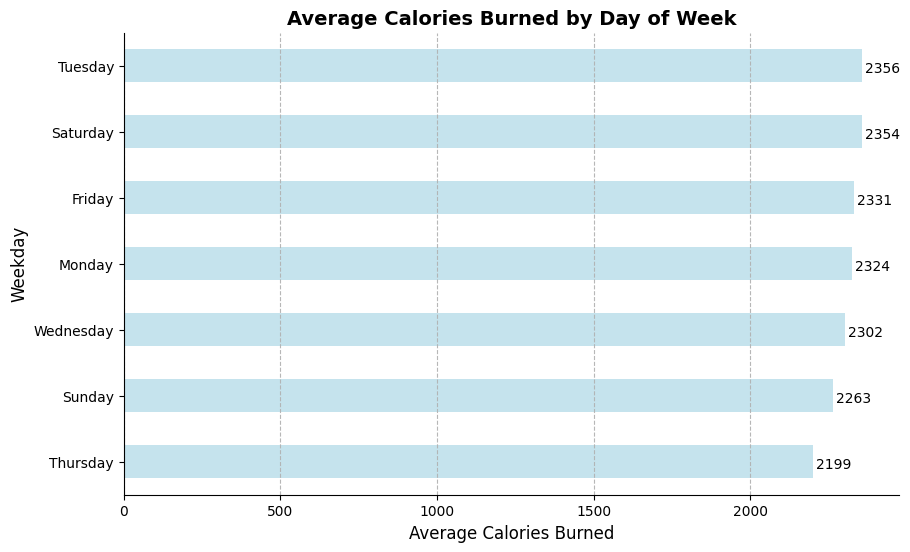

In [41]:
# Group the data by weekday and calculate the mean calories burned for each weekday
avg_calories = daily_activity_df.groupby('weekday')['Calories'].mean()

# Sort the value by descending order
avg_calories = avg_calories.sort_values()

# Create a bar graph using Pandas plot function
ax = avg_calories.plot(kind='barh',  figsize = (10,6), color='lightblue', alpha=0.7)

# Set the title and axis labels
ax.set_title('Average Calories Burned by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Calories Burned', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)

# Add grid lines and remove spines
ax.grid(axis='x', linestyle='--', alpha=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(False)

# Add labels to the bars
for i, v in enumerate(avg_calories):
    ax.text(v + 10, i - 0.1, str(int(v)), color='black', fontsize=10)
    
# save the plot to a file
plt.savefig('plots/avg_cal_burned_by_day.png')

# Show the plot
plt.show()

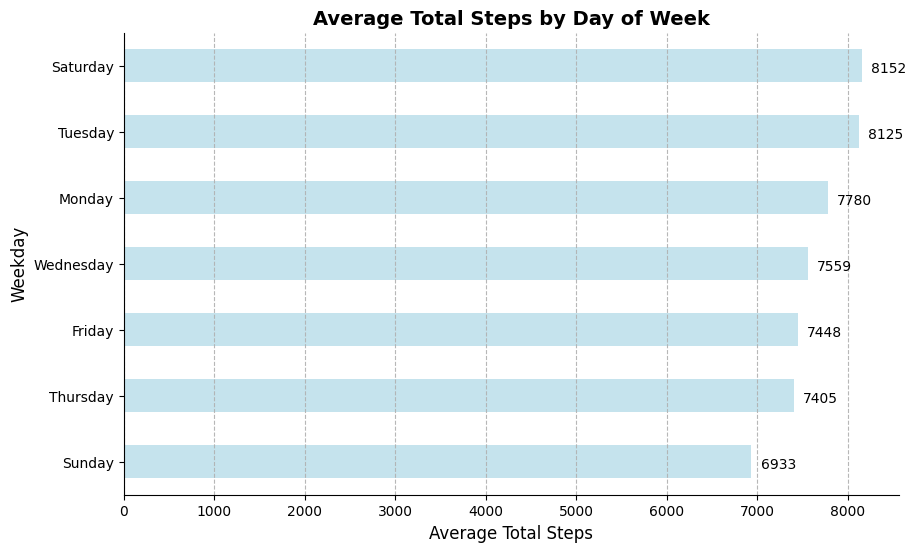

In [42]:
# Set the weekday column as a categorical data type with the desired order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity_df['weekday'] = pd.Categorical(daily_activity_df['weekday'], categories=weekday_order, ordered=True)

# Group the data by weekday and calculate the mean total steps for each weekday
avg_step_by_day = daily_activity_df.groupby('weekday')['TotalSteps'].mean()

# Sort the value by descending order
avg_step_by_day = avg_step_by_day.sort_values()

# Create a bar graph using Pandas plot function
ax = avg_step_by_day.plot(kind='barh',  figsize = (10,6), color='lightblue', alpha=0.7)

# Set the title and axis labels
ax.set_title('Average Total Steps by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Total Steps', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)

# Add grid lines and remove spines
ax.grid(axis='x', linestyle='--', alpha=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(False)

# Add labels to the bars
for i, v in enumerate(avg_step_by_day):
    ax.text(v + 100, i - 0.1, str(int(v)), color='black', fontsize=10)

# save the plot to a file
plt.savefig('plots/avg_step_by_day.png')

# Show the plot
plt.show()

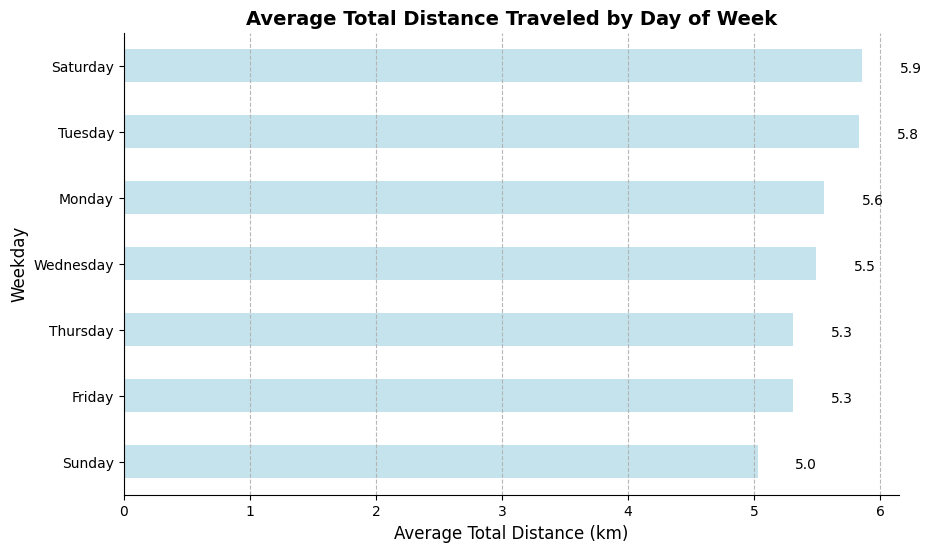

In [43]:
# Group the data by weekday and calculate the mean total distance for each weekday
avg_total_dist_by_day = daily_activity_df.groupby('weekday')['TotalDistance'].mean()

# Sort the value by descending order
avg_total_dist_by_day = avg_total_dist_by_day.sort_values()

# Create a bar graph using Pandas plot function
ax = avg_total_dist_by_day.plot(kind='barh',  figsize = (10,6), color='lightblue', alpha=0.7)

# Set the title and axis labels
ax.set_title('Average Total Distance Traveled by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Average Total Distance (km)', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)

# Add grid lines and remove spines
ax.grid(axis='x', linestyle='--', alpha=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(False)

# Add labels to the bars
for i, v in enumerate(avg_total_dist_by_day):
    ax.text(v + 0.3, i - 0.1, '{:.1f}'.format(v), color='black', fontsize=10)

# save the plot to a file    
plt.savefig('plots/avg_dist_by_day.png')

# Show the plot
plt.show()

/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/2293481536.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_activity_by_day = daily_activity_df.groupby('weekday').mean()


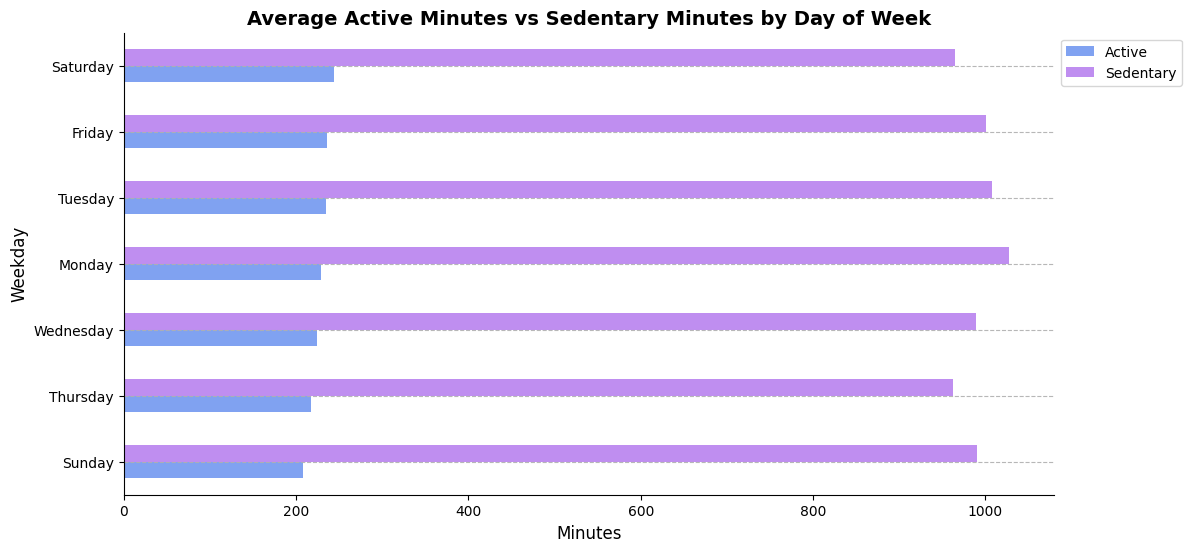

In [44]:
# Set the weekday column as a categorical data type with the desired order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity_df['weekday'] = pd.Categorical(daily_activity_df['weekday'], categories=weekday_order, ordered=True)

# Group the data by weekday and calculate the sum values for each column
avg_activity_by_day = daily_activity_df.groupby('weekday').mean()

# Sort the value by total active minutes in descending order descending order
avg_activity_by_day = avg_activity_by_day.sort_values(by='TotalActiveMinutes')

# Set the colors for the bars
colors = ['#4b7bec', '#a55eea', '#f53b57', '#ced6e0', '#ff6b81', '#576574']

# Create a bar graph using Pandas plot function
ax = avg_activity_by_day.plot(kind='barh', y=['TotalActiveMinutes', 'SedentaryMinutes'], figsize = (12,6), color=colors,alpha=0.7)

# Set the title and axis labels
ax.set_title('Average Active Minutes vs Sedentary Minutes by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Minutes', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)

# Set the legend
ax.legend(['Active', 'Sedentary'], bbox_to_anchor=(1, 1))



# Add grid lines and remove spines
ax.grid(axis='y', linestyle='--', alpha=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# save the plot to a file
plt.savefig('plots/avg_active_minutes_vs_sedentary_by_day.png')

# Show the plot
plt.show()

/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/2339234939.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_distance_by_day = daily_activity_df.groupby('weekday').mean()


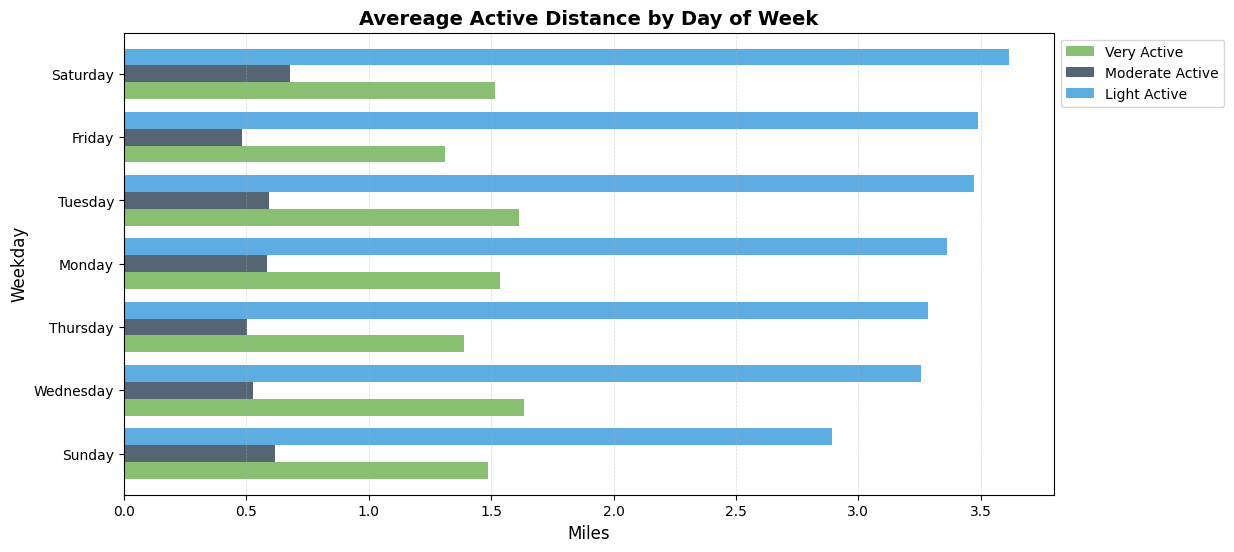

In [45]:
# Set the weekday column as a categorical data type with the desired order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity_df['weekday'] = pd.Categorical(daily_activity_df['weekday'], categories=weekday_order, ordered=True)

# Set the colors for the bars
colors = ['#6ab04c', '#2c3e50', '#3498db']

# Group the data by weekday and calculate the sum values for each column
avg_distance_by_day = daily_activity_df.groupby('weekday').mean()

# Sort the value by total light active in descending order descending order
avg_distance_by_day = avg_distance_by_day.sort_values(by='LightActiveDistance')

# Create a bar graph using Pandas plot function
ax = avg_distance_by_day.plot(kind='barh', y=["VeryActiveDistance","ModeratelyActiveDistance","LightActiveDistance"], figsize=(12, 6), width=0.8, color=colors, alpha=0.8)

# Set the title and axis labels
ax.set_title('Avereage Active Distance by Day of Week', fontsize=14, fontweight='bold')
ax.set_xlabel('Miles', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)


# Add horizontal grid lines
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.5)


# Set the legend
ax.legend(['Very Active', 'Moderate Active', 'Light Active'],
          bbox_to_anchor=(1, 1))

# save the plot to a file
plt.savefig('plots/avg_active_distance_by_day.png')

# Display the plot
plt.show()

/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/2127965325.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_active_minutes_by_day = daily_activity_df.groupby('weekday').mean()


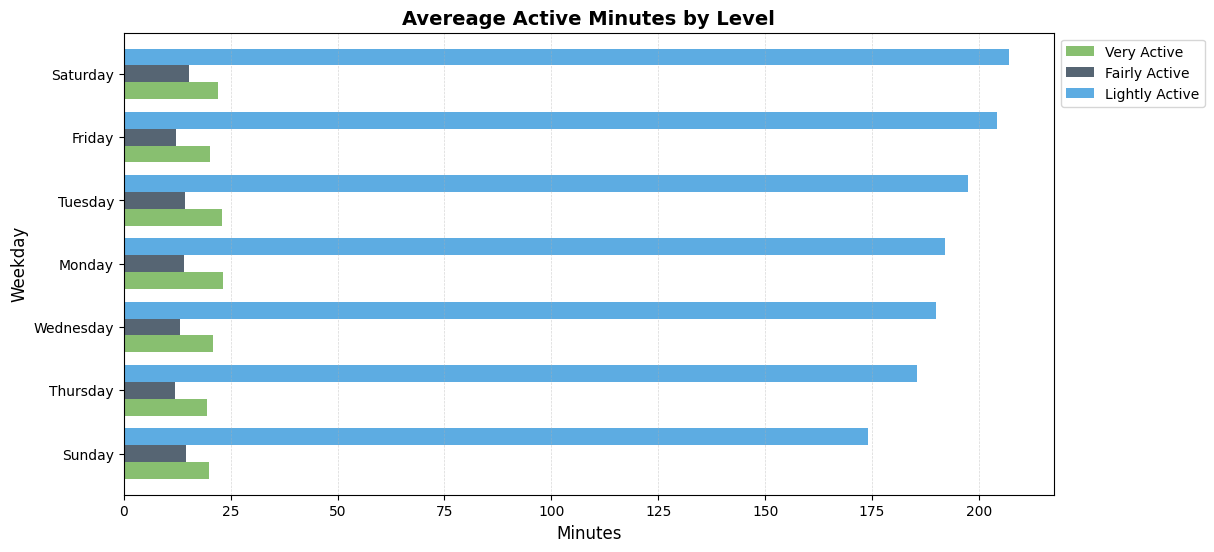

In [46]:
# Set the weekday column as a categorical data type with the desired order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity_df['weekday'] = pd.Categorical(daily_activity_df['weekday'], categories=weekday_order, ordered=True)

# Set the colors for the bars
colors = ['#6ab04c', '#2c3e50', '#3498db']

# Group the data by weekday and calculate the sum values for each column
avg_active_minutes_by_day = daily_activity_df.groupby('weekday').mean()

# Sort the value by total light active minutes in descending order descending order
avg_active_minutes_by_day = avg_active_minutes_by_day.sort_values(by='LightlyActiveMinutes')

# Create a bar graph using Pandas plot function
ax = avg_active_minutes_by_day.plot(kind='barh', y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes' ], figsize=(12, 6), width=0.8, color=colors, alpha=0.8)

# Set the title and axis labels
ax.set_title('Avereage Active Minutes by Level', fontsize=14, fontweight='bold')
ax.set_xlabel('Minutes', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)


# Add horizontal grid lines
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.5)


# Set the legend
ax.legend(['Very Active', 'Fairly Active', 'Lightly Active'], bbox_to_anchor=(1, 1))


# save the plot to a file
plt.savefig('plots/avg_active_minutes_by_level.png')

# Display the plot
plt.show()

### Heart Rate

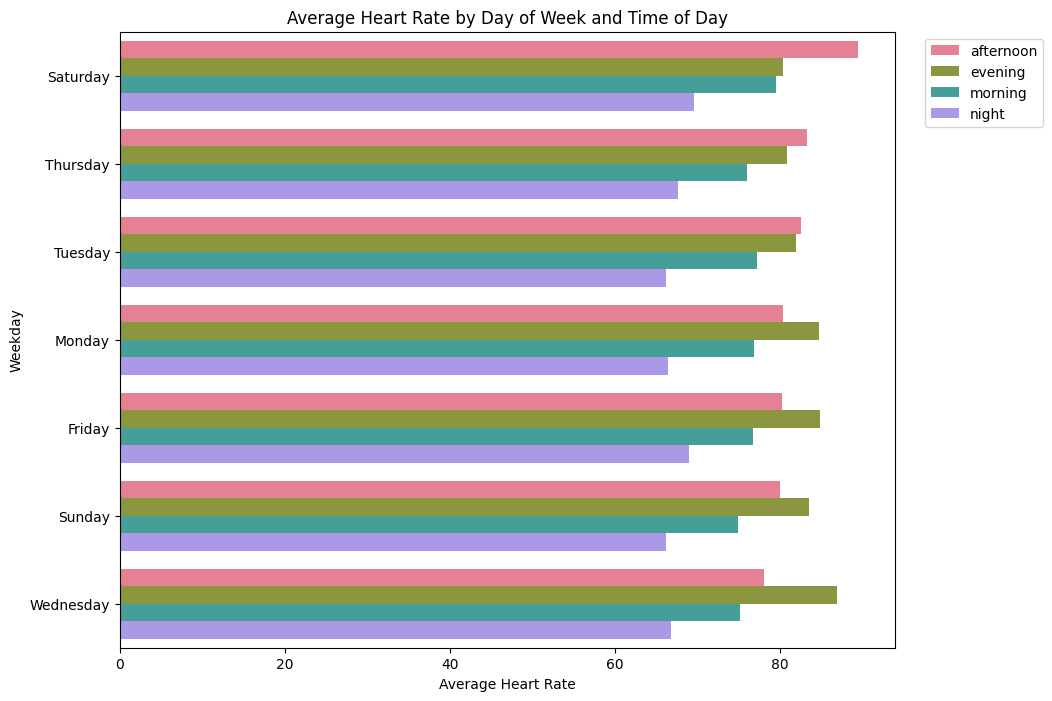

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the average heart rate value using "Value" column
hr_avg = heart_rate_df.groupby(["weekday", "Time_Category"])["Value"].mean().reset_index()

# Sort the data by the average value of heart rate for "Time_category" and then by "weekday"
hr_avg = hr_avg.sort_values(["Time_Category", "Value"], ascending=[True, False])

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x="Value", y="weekday", hue="Time_Category", data=hr_avg, ax=ax, orient="h", palette='husl')

# Set the title and axes labels
ax.set_title("Average Heart Rate by Day of Week and Time of Day")
ax.set_xlabel("Average Heart Rate")
ax.set_ylabel("Weekday")

# Move the legend to the top right corner
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1))

# save the plot to a file
plt.savefig('plots/avg_heart_rate_by_day_and_daytime.png')

# Display the plot
plt.show()


### Sleep

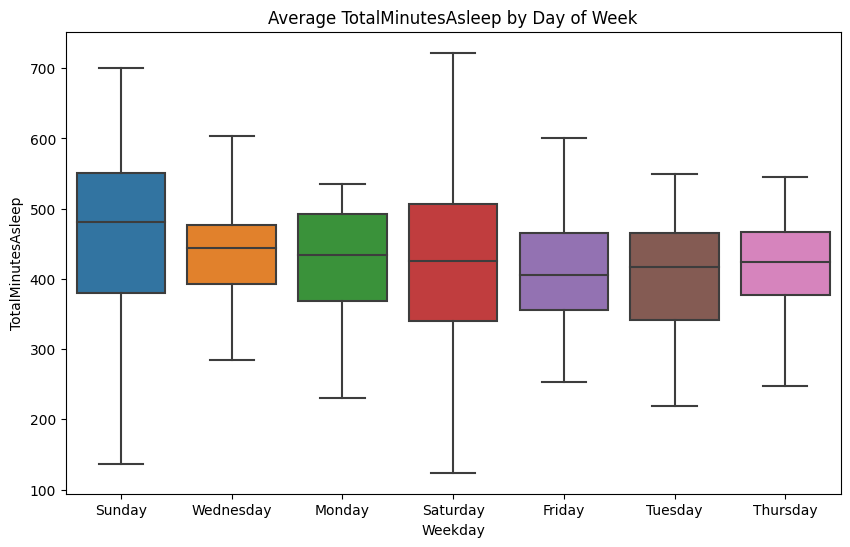

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the average of "TotalMinutesAsleep", group it by 'weekday', and sort it in descending order
sleep_grouped = sleep_df.groupby('weekday')['TotalMinutesAsleep'].mean().sort_values(ascending=False)

# Create a box plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='weekday', y='TotalMinutesAsleep', data=sleep_df, order=sleep_grouped.index, showfliers=False, ax=ax)

plt.title('Average TotalMinutesAsleep by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('TotalMinutesAsleep')

# save the plot to a file
plt.savefig('plots/avg_sleep_by_day.png')

### Examine the correlation between variables

/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/3527627114.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = daily_activity_df.corr()
/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/3527627114.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(daily_activity_df.corr(), dtype=bool))
/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/3527627114.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


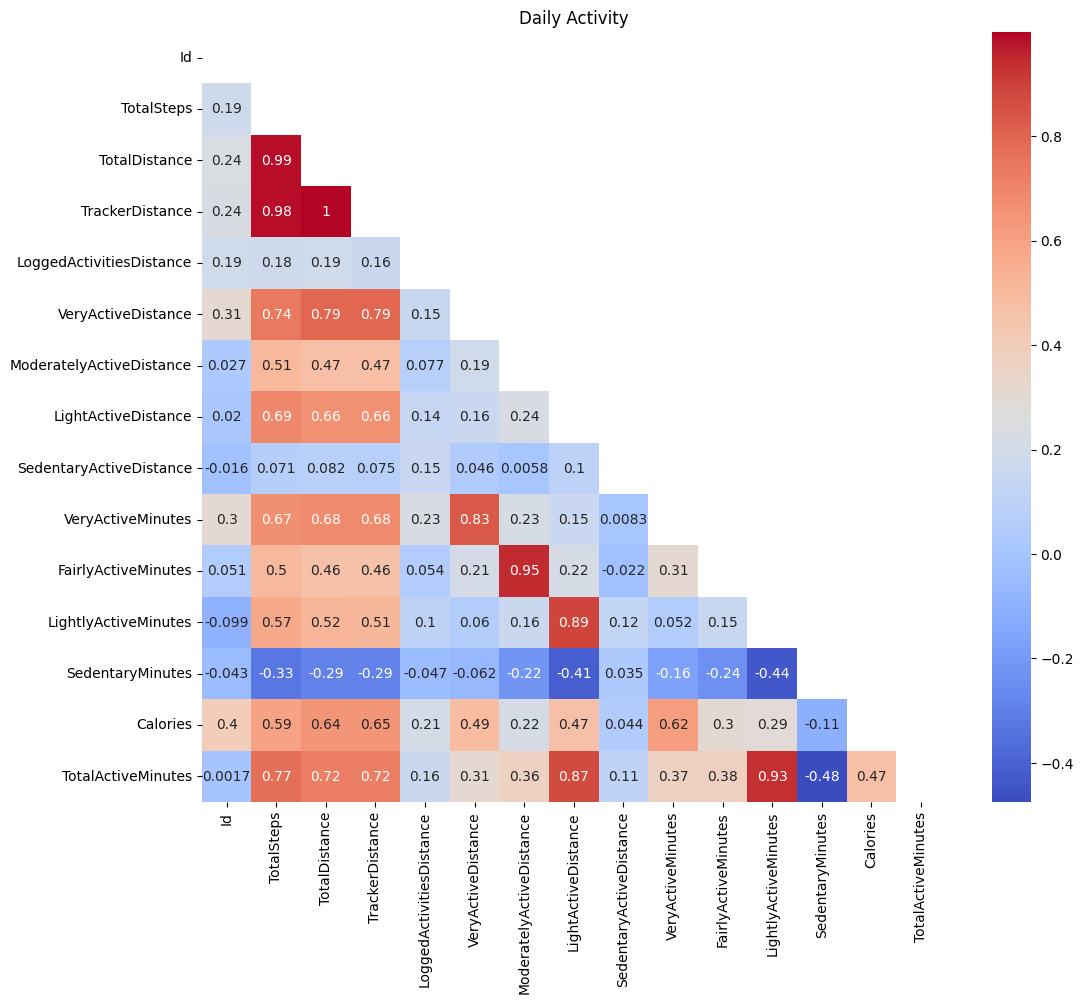

In [49]:
# Correlation between physcial activities variables
# Correlation matrix
corr = daily_activity_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12,10))
plt.title("Daily Activity")
mask = np.triu(np.ones_like(daily_activity_df.corr(), dtype=bool))
sns.heatmap(daily_activity_df.corr(), mask=mask, cmap='coolwarm', annot=True)

# save the plot to a file
plt.savefig('plots/activity_corr_heat_map.png')

#display the heatmap
plt.show()



/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/1068090298.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_merged.corr()
/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/1068090298.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_merged.corr(), dtype=bool))
/var/folders/wf/jxsh9bqd28j75tcjmg2ms3tr0000gp/T/ipykernel_69395/1068090298.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df

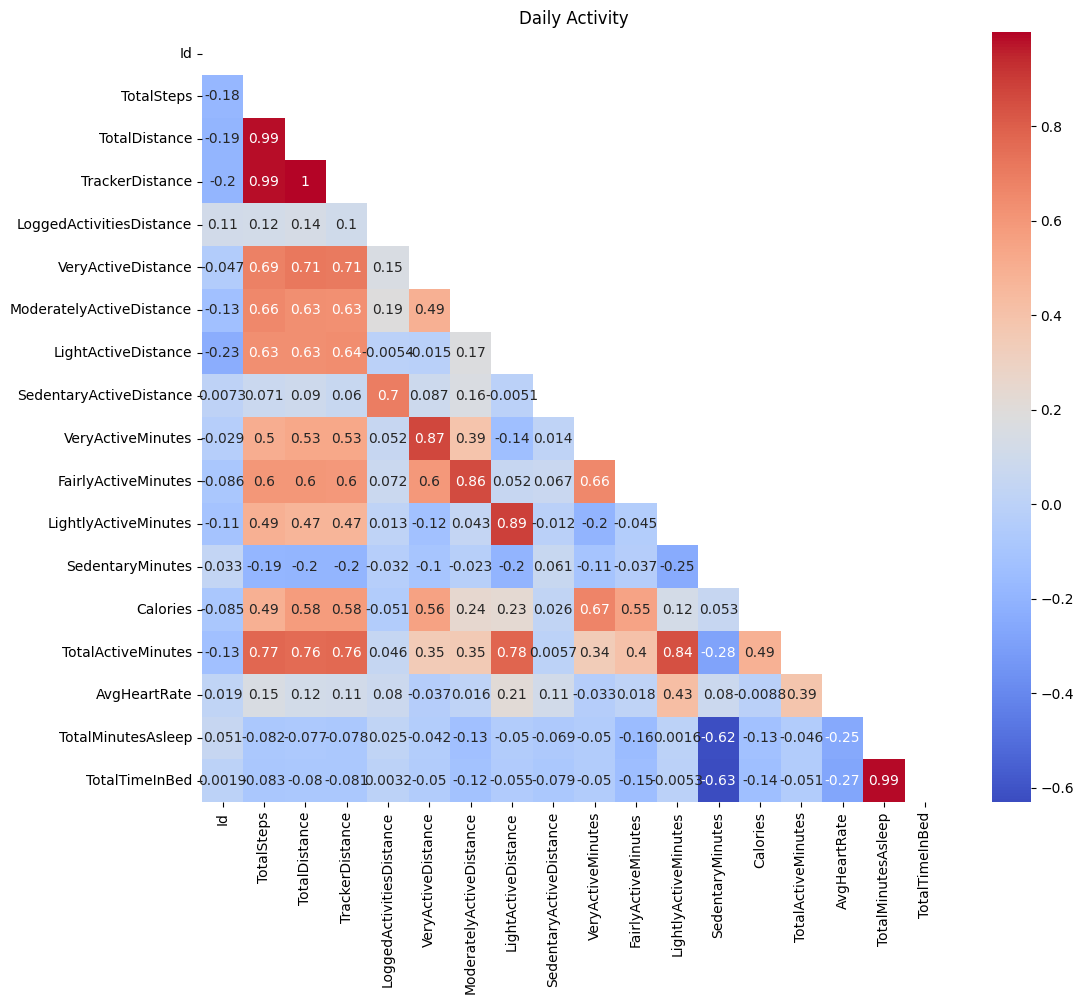

In [50]:
# Correlation between physcial, heart rate, and sleep variable
# Correlation matrix
corr = df_merged.corr()

# Plot correlation matrix
plt.figure(figsize=(12,10))
plt.title("Daily Activity")
mask = np.triu(np.ones_like(df_merged.corr(), dtype=bool))
sns.heatmap(df_merged.corr(), mask=mask, cmap='coolwarm', annot=True)

# save the plot to a file
plt.savefig('plots/activity_heartrate_sleep_heatmap.png')

#Display the heat map
plt.show()



# Phase 4: Anayse

### Physical activity

Fitbit trackers measure physical activity in terms of "active minutes," which are the minutes during which you engage in moderate to intense physical activity.

Fitbit defines three levels of physical activity:

1. Lightly Active Minutes: These are minutes when you are active, but not necessarily exercising. This might include activities like walking around the house, doing light chores, or standing up from your desk periodically.

2. Fairly Active Minutes: These are minutes when you are engaging in moderate-intensity exercise or activity. This might include activities like brisk walking, cycling, or doing household chores that require a bit more effort.

3. Very Active Minutes: These are minutes when you are engaging in high-intensity exercise or activity. This might include activities like running, hiking, or playing a sport at a competitive level.

Fitbit uses its sensors to track your movements and heart rate to determine the level of activity you are engaged in, and then assigns active minutes accordingly. The more active you are, the more active minutes you will accumulate.

<div style="display:flex">
    <div style="flex:1;padding-right:5px;">
        <img src="plots/avg_active_vs_sedentary_minutes_by_day.png">
    </div>
    <div style="flex:1;padding-left:5px;">
        <img src="plots/avg_active_minutes_by_level.png">
    </div>
</div>


On average, Saturday, Tuesday, and Friday are the top three most active days of the week, with Monday, Wednesday, Thursday, and Sunday following suit. People typically accumulate around 20 minutes of very active minutes and 15 minutes of fairly active minutes per day. However, the level of lightly active minutes varies across the days, with Saturday, Friday, and Tuesday being the top three, followed by Monday, Wednesday, Thursday, and Sunday.

It is noteworthy that the level of lightly active minutes is a significant factor that distinguishes the most active day from the least active day of the week. These findings suggest that people who engage in more light activities throughout the day tend to be more active overall.

![avg_cal_burned_by_day](plots/avg_cal_burned_by_day.png)

In terms of calorie expenditure, it appears that Tuesday, Saturday, and Friday are the top three days where people tend to burn the most calories, followed by Monday, Wednesday, Sunday, and Thursday. This pattern is similar to the distribution of active minutes throughout the week, indicating that there may be a relationship between physical activity and calorie burn. These insights could be valuable in developing strategies to encourage individuals to be more physically active and burn more calories, potentially leading to improved health outcomes.

![avg_dist_by_day](plots/avg_dist_by_day.png)

![avg_step_by_day](avg_step_by_day.png)

Upon analyzing the total distance traveled and total steps taken by day of the week, it becomes evident that Saturday, Tuesday, and Friday are the top three most active days. Interestingly, outdoor activities seem to be more common on Saturday and Tuesday, while indoor activities are more prevalent on Friday. This is reflected in the average total distance traveled and average total steps taken, with Saturday and Tuesday consistently ranking within the top three, while Friday falls to the bottom three in these categories.

Given that the majority of active minutes are accounted for by light activities, it is reasonable to infer that people engage in outdoor light exercises such as jogging on Saturday and Tuesday, whereas on Friday, indoor activities are more prevalent. These insights can be useful in developing targeted interventions and promoting physical activity by emphasizing outdoor activities as a means of staying active and healthy

### Heart rate

![avg_heart_rate_by_day_and_daytime](plots/avg_heart_rate_by_day_and_daytime.png)

Through an analysis of the average heart rate by day of the week and time of day, we can gain insights into when people tend to engage in high-intensity exercise. Among the top three most active days, we observe that people tend to perform high-intensity exercises in the afternoon on Saturday, and in the evening or afternoon on Tuesday. On Friday, high-intensity exercise is more commonly performed in the evening.

These findings provide valuable information for fitness product manufacturers and wellness professionals to create personalized recommendations that align with users' schedules and natural tendencies. For instance, they can suggest that people engage in high-intensity exercise during specific times of the day to maximize the benefits of their workout, based on the patterns observed in the data. Furthermore, these insights can inform the design and marketing of fitness products to better meet the needs of consumers, ultimately leading to improved health and wellness outcomes.

### Sleep

![average_sleep](plots/avg_sleep_by_day.png)

The box plot analysis indicates that people tend to have less total sleep time on their most active days, with Saturday, Friday, and Tuesday ranking among the bottom four. Conversely, on the least active days such as Sunday, Wednesday, and Monday, people tend to have more total minutes of sleep on average.

These insights can be used to develop personalized recommendations for improving sleep habits and overall wellness. For example, on more active days, people may benefit from incorporating activities that promote relaxation and stress reduction to help them wind down before bed. Similarly, on less active days, people may want to consider more physically demanding activities that promote better sleep quality. Additionally, fitness product manufacturers and wellness professionals can use this information to design products that integrate sleep tracking and provide personalized recommendations to users to optimize their sleep and overall health.

## Summary:

* Saturday, Tuesday, and Friday are the top three most active days, while Sunday, Wednesday, and Monday are the least active.

* People accumulate around 20 minutes of very active minutes and 15 minutes of fairly active minutes per day.
 
* Lightly active minutes vary across the days and are a significant factor in distinguishing the most active day from the least active day.

* Tuesday, Saturday, and Friday are the top three days where people tend to burn the most calories, followed by Monday, Wednesday, Sunday, and Thursday.

* Saturday, Tuesday, and Friday are the top three most active days in terms of total distance traveled and total steps taken.

* Outdoor activities seem to be more common on Saturday and Tuesday, while indoor activities are more prevalent on Friday.

* People tend to perform high-intensity exercises in the afternoon on Saturday and in the evening or afternoon on Tuesday, with high-intensity exercise more commonly performed in the evening on Friday.

* People tend to have less total sleep time on their most active days, with Saturday, Friday, and Tuesday ranking among the bottom four.



# Phase 5: Share

## Recommendation for Bellabeat

Based on the insights provided, Bellabeat can develop a marketing strategy for one of their products as follows:

Product: Bellabeat fitness tracker

Target audience: People who are interested in improving their physical activity levels and overall wellness

Marketing Strategy:

1. Promote outdoor activities: Given that outdoor activities are more prevalent on Saturday and Tuesday, Bellabeat can emphasize the benefits of outdoor exercise in its marketing campaigns. For instance, Bellabeat can create social media campaigns featuring pictures of people engaging in outdoor activities, and highlight the health benefits of jogging, hiking, and other outdoor activities.

2. Emphasize the importance of light activities: Bellabeat can use the insight that light activities contribute significantly to overall physical activity levels in its marketing campaigns. The campaigns can focus on how incorporating light activities throughout the day can lead to improved health outcomes.

3. Personalized workout recommendations: Bellabeat can create personalized workout recommendations based on when users tend to engage in high-intensity exercises. For example, if a user tends to engage in high-intensity exercise in the afternoon on Saturdays, Bellabeat can recommend specific high-intensity exercises for that time of day.

4. Improve sleep habits: Bellabeat can use the insight that people tend to have less sleep time on their most active days to develop personalized recommendations for improving sleep habits. Bellabeat can suggest activities that promote relaxation and stress reduction to help users wind down before bed on more active days.

5. Highlight the relationship between physical activity and calorie burn: Bellabeat can emphasize the relationship between physical activity and calorie burn in its marketing campaigns. The campaigns can highlight how being physically active on specific days of the week can lead to increased calorie burn, and ultimately, improved health outcomes.

6. Use social media influencers: Bellabeat can collaborate with social media influencers who are interested in health and wellness to promote its fitness tracker. The influencers can create posts featuring the product and highlight its features and benefits.

Overall, Bellabeat can use the insights provided to develop targeted marketing campaigns that resonate with its target audience and ultimately lead to improved health and wellness outcomes.